In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-26-2020.csv')

In [5]:
print(df.head())
df.info()

   Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-27 04:35:15  32.3182  -86.9023   
1          Alaska             US  2020-07-27 04:35:15  61.3707 -152.4044   
2  American Samoa             US  2020-07-27 04:35:15 -14.2710 -170.1320   
3         Arizona             US  2020-07-27 04:35:15  33.7298 -111.4312   
4        Arkansas             US  2020-07-27 04:35:15  34.9697  -92.3731   

   Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  People_Tested  \
0      79294    1473    32510.0   45311.0     1    1617.193722       649686.0   
1       2525      20      817.0    1688.0     2     345.159901       207264.0   
2          0       0        NaN       0.0    60       0.000000         1037.0   
3     162014    3305    20978.0  137731.0     4    2225.859310       867103.0   
4      38623     401    31622.0    6600.0     5    1279.837922       477267.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  T

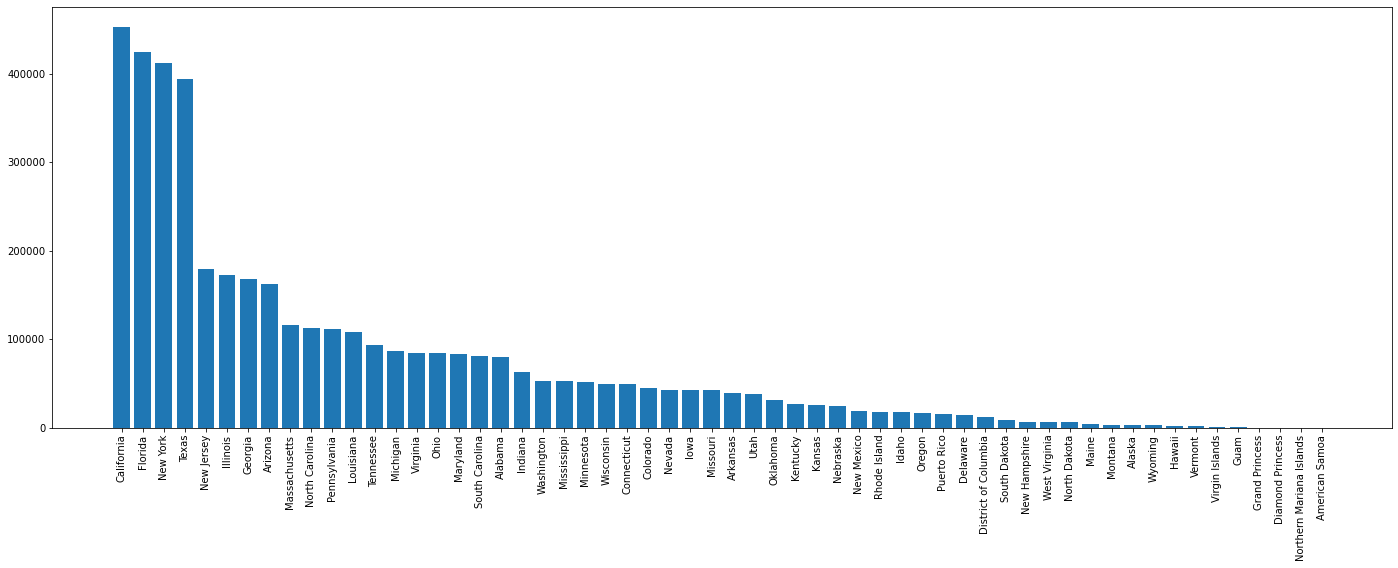

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 8))

plot_df = df[['Province_State', 'Confirmed']]
plot_df  =plot_df.sort_values('Confirmed', ascending = False)

plt.bar(x=plot_df['Province_State'], height=plot_df['Confirmed'])

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(plot_df['Province_State'], plot_df['Province_State'], rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

# Cases per capita

In [30]:
state_df = pd.read_csv(r'csvData.csv')
state_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937500,0.0096,39557000,37320900,0.0701,0.1194,256.3728
1,2,Texas,29472300,0.0268,28701800,25242700,0.1676,0.0881,112.8204
2,3,Florida,21993000,0.0326,21299300,18845800,0.1670,0.0658,410.1259
3,4,New York,19440500,-0.0052,19542200,19400100,0.0021,0.0581,412.5218
4,5,Pennsylvania,12820900,0.0011,12807100,12711200,0.0086,0.0383,286.5454


In [31]:
perc_df = pd.merge(df, state_df, left_on='Province_State', right_on='State')
perc_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Hospitalization_Rate,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,Alabama,US,2020-07-27 04:35:15,32.3182,-86.9023,79294,1473,32510.0,45311.0,1,...,11.548163,24,Alabama,4908620,0.0042,4887870,4785450,0.0257,0.0147,96.9221
1,Alaska,US,2020-07-27 04:35:15,61.3707,-152.4044,2525,20,817.0,1688.0,2,...,NaN,49,Alaska,734002,-0.0047,737438,713906,0.0281,0.0022,1.2863
2,Arizona,US,2020-07-27 04:35:15,33.7298,-111.4312,162014,3305,20978.0,137731.0,4,...,4.756379,14,Arizona,7378490,0.0288,7171650,6407770,0.1515,0.0221,64.9549
3,Arkansas,US,2020-07-27 04:35:15,34.9697,-92.3731,38623,401,31622.0,6600.0,5,...,6.581571,33,Arkansas,3039000,0.0084,3013820,2921980,0.0400,0.0091,58.4030
4,California,US,2020-07-27 04:35:15,36.1162,-119.6816,452288,8448,NaN,443840.0,6,...,NaN,1,California,39937500,0.0096,39557000,37320900,0.0701,0.1194,256.3728


In [32]:
perc_df['Percent_Confirmed'] = perc_df['Confirmed'] /perc_df ['Pop'] * 100

In [33]:
perc_df = perc_df[['Province_State', 'Percent_Confirmed']]

In [35]:
perc_df = perc_df.sort_values(by='Percent_Confirmed')

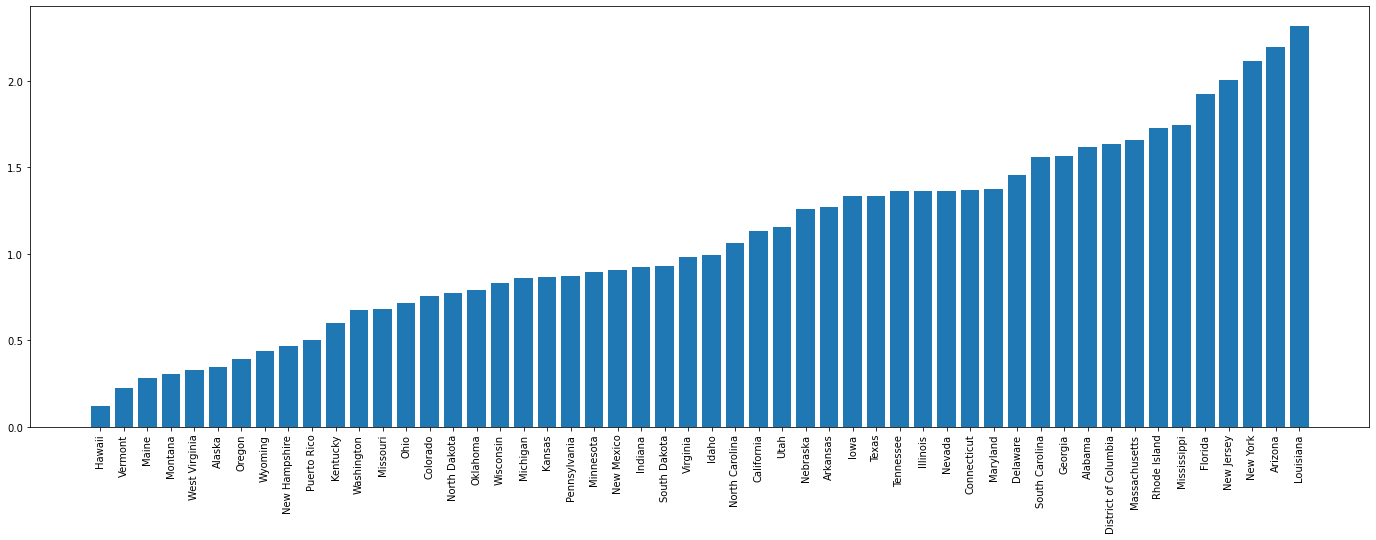

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 8))


plt.bar(x=perc_df['Province_State'], height=perc_df['Percent_Confirmed'])

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(perc_df['Province_State'], perc_df['Province_State'], rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)